In [21]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [10]:

import matplotlib.pyplot as plt
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

1. CN-->Conv2d
2. MP-->max_pooling2d
3. DP-->Dropout
4. FL-->Flatten
5. DN-->Dense


<h2> 1st Model  CN(72,(7,7))->CN(38,(7,7))->CN(20,(7,7))->MP(2,2)->DP(0.25)->FL()->DN(10)  </h2>

In [29]:
K.clear_session()
model = Sequential()
model.add(Conv2D(72, kernel_size=(7, 7),activation='relu',input_shape=input_shape))
model.add(Conv2D(38, (7, 7), activation='relu'))
model.add(Conv2D(20, (7, 7), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 22, 22, 72)        3600      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 38)        134102    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 20)        37260     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 20)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 20)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               64128     
__________

In [14]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam', metrics=['accuracy'])
history=model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 66s 1ms/step - loss: 0.2616 - acc: 0.9211 - val_loss: 0.0515 - val_acc: 0.9839
Epoch 2/12
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0912 - acc: 0.9725 - val_loss: 0.0402 - val_acc: 0.9860
Epoch 3/12
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0694 - acc: 0.9790 - val_loss: 0.0330 - val_acc: 0.9893
Epoch 4/12
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0582 - acc: 0.9824 - val_loss: 0.0326 - val_acc: 0.9893
Epoch 5/12
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0504 - acc: 0.9852 - val_loss: 0.0278 - val_acc: 0.9913
Epoch 6/12
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0474 - acc: 0.9864 - val_loss: 0.0296 - val_acc: 0.9897
Epoch 7/12
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0413 - acc: 0.9873 - val_loss: 0.0260 - val_acc

Test score: 0.023416508061222523
Test accuracy: 0.9926


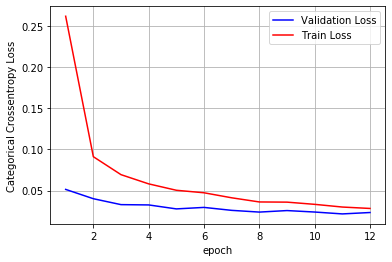

In [15]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h3> 2nd Model  CN(20,(5,5))->BN()->CN(20)->BN()->CN(40)->BN()->CN(10)->BN()->CN(10)->MP(2,2)->DP(0.25)->FL()->DN(128)  </h3>

In [22]:
K.clear_session()
model_1 = Sequential()
model_1.add(Conv2D(20, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
model_1.add(BatchNormalization())
model_1.add(Conv2D(20, (5, 5), activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(40, (5, 5), activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(10, (5, 5), activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(10, (5, 5), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes, activation='softmax'))
model_1.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 20)        520       
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 20)        80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 20)        10020     
_________________________________________________________________
batch_normalization_2 (Batch (None, 20, 20, 20)        80        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 40)        20040     
_________________________________________________________________
batch_normalization_3 (Batch (None, 16, 16, 40)        160       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 10)        10010     
_________

In [23]:
model_1.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam', metrics=['accuracy'])
history=model_1.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 52s 870us/step - loss: 0.4221 - acc: 0.8676 - val_loss: 0.0828 - val_acc: 0.9767
Epoch 2/12
60000/60000 [==============================] - 50s 833us/step - loss: 0.1077 - acc: 0.9700 - val_loss: 0.0470 - val_acc: 0.9852
Epoch 3/12
60000/60000 [==============================] - 50s 831us/step - loss: 0.0775 - acc: 0.9775 - val_loss: 0.0450 - val_acc: 0.9863
Epoch 4/12
60000/60000 [==============================] - 50s 832us/step - loss: 0.0664 - acc: 0.9813 - val_loss: 0.0429 - val_acc: 0.9867
Epoch 5/12
60000/60000 [==============================] - 50s 834us/step - loss: 0.0562 - acc: 0.9835 - val_loss: 0.0338 - val_acc: 0.9903
Epoch 6/12
60000/60000 [==============================] - 50s 832us/step - loss: 0.0494 - acc: 0.9858 - val_loss: 0.0301 - val_acc: 0.9908
Epoch 7/12
60000/60000 [==============================] - 50s 834us/step - loss: 0.0482 - acc: 0.9861 - val_loss: 0.

Test score: 0.029317251708592812
Test accuracy: 0.9914


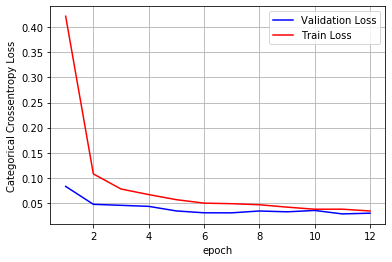

In [25]:
score = model_1.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h6> 3rd Model  CN(30,(5,5))->BN()->CN(30)->BN()->CN(50)->BN()->CN(50)->BN()->CN(100)->BN()->CN(100)->MP(2,2)->BN()->CN(150)->MP(2,2)->DP(0.25)->FL()->DN(120)  </h6>

In [44]:
K.clear_session()
model_2 = Sequential()
model_2.add(Conv2D(30, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model_2.add(BatchNormalization())
model_2.add(Conv2D(30, (3, 3), activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Conv2D(50, (3, 3), activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Conv2D(50, (3, 3), activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Conv2D(100, (3, 3), activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Conv2D(100, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(BatchNormalization())
model_2.add(Conv2D(150, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))
model_2.add(Flatten())
model_2.add(Dense(120, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes, activation='softmax'))
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 30)        300       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 30)        120       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 30)        8130      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 30)        120       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 50)        13550     
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 50)        200       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 50)        22550     
__________

In [45]:
model_2.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam', metrics=['accuracy'])
history=model_2.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 195s 3ms/step - loss: 0.2658 - acc: 0.9202 - val_loss: 0.0506 - val_acc: 0.9843
Epoch 2/12
60000/60000 [==============================] - 198s 3ms/step - loss: 0.1011 - acc: 0.9720 - val_loss: 0.0383 - val_acc: 0.9891
Epoch 3/12
60000/60000 [==============================] - 198s 3ms/step - loss: 0.0750 - acc: 0.9799 - val_loss: 0.0309 - val_acc: 0.9903
Epoch 4/12
60000/60000 [==============================] - 197s 3ms/step - loss: 0.0681 - acc: 0.9812 - val_loss: 0.0270 - val_acc: 0.9915
Epoch 5/12
60000/60000 [==============================] - 198s 3ms/step - loss: 0.0546 - acc: 0.9852 - val_loss: 0.0338 - val_acc: 0.9901
Epoch 6/12
60000/60000 [==============================] - 198s 3ms/step - loss: 0.0450 - acc: 0.9872 - val_loss: 0.0300 - val_acc: 0.9924
Epoch 7/12
60000/60000 [==============================] - 198s 3ms/step - loss: 0.0428 - acc: 0.9878 - val_loss: 0.0251 - 

Test score: 0.029114628794253077
Test accuracy: 0.9915


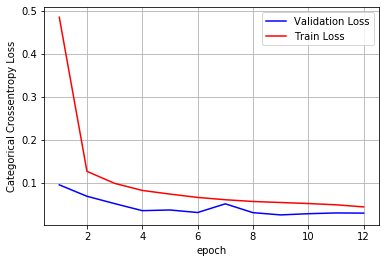

In [41]:
score = model_2.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h3>Observation</h3>
We have 28X28 size image if we add max pooling layer multiple times in Network demission of the image will reduce and we will get following error
“Negative dimension size caused by subtracting 3 from 2 for 'conv2d_7/convolution' (op: 'Conv2D') with input shapes: [?,2,2,20], [3,3,20,20]. ”


In [59]:
print("(Model 1st:-",  "CN(72,(7,7))->CN(38,(7,7))->CN(20,(7,7))->MP(2,2)->DP(0.25)->FL()->DN(10)\n")
print("(Model 2nd:-CN(20,(5,5))->BN()->CN(20)->BN()->CN(40)->BN()->CN(10)->BN()->CN(10)->MP(2,2)->DP(0.25)->FL()->DN(128)\n")
print("(Model 3rd:-",  "CN(30,(5,5))->BN()->CN(30)->BN()->CN(50)->BN()->CN(50)->BN()->CN(100)->BN()->CN(100)->MP(2,2)->BN()->CN(150)->MP(2,2)->DP(0.25)->FL()->DN(120)")


(Model 1st:- CN(72,(7,7))->CN(38,(7,7))->CN(20,(7,7))->MP(2,2)->DP(0.25)->FL()->DN(10)

(Model 2nd:-CN(20,(5,5))->BN()->CN(20)->BN()->CN(40)->BN()->CN(10)->BN()->CN(10)->MP(2,2)->DP(0.25)->FL()->DN(128)

(Model 3rd:- CN(30,(5,5))->BN()->CN(30)->BN()->CN(50)->BN()->CN(50)->BN()->CN(100)->BN()->CN(100)->MP(2,2)->BN()->CN(150)->MP(2,2)->DP(0.25)->FL()->DN(120)


In [62]:
from prettytable import PrettyTable  
table = PrettyTable()

table.field_names = ["Model","Accuracy"]

table.add_row(["Model 1st","0.9926" ])
table.add_row(["Model 2nd","0.9914" ])
table.add_row(["Model 3nd","0.9915" ])
print(table)

+-----------+----------+
|   Model   | Accuracy |
+-----------+----------+
| Model 1st |  0.9926  |
| Model 2nd |  0.9914  |
| Model 3nd |  0.9915  |
+-----------+----------+
